In [43]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [44]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

## **Exploring the dataset**

In [45]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [46]:
df.shape

(76014, 15)

In [47]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [48]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## **Data Cleaning**
Points covered under this section:<br/>
*• Removing unwanted columns*<br/>
*• Keeping only consistent teams*<br/>
*• Removing the first 5 overs data in every match*<br/>
*• Converting the column 'date' from string into datetime object*<br/>

In [49]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [50]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [51]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [52]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [53]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [54]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [55]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [56]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [57]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [58]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [59]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


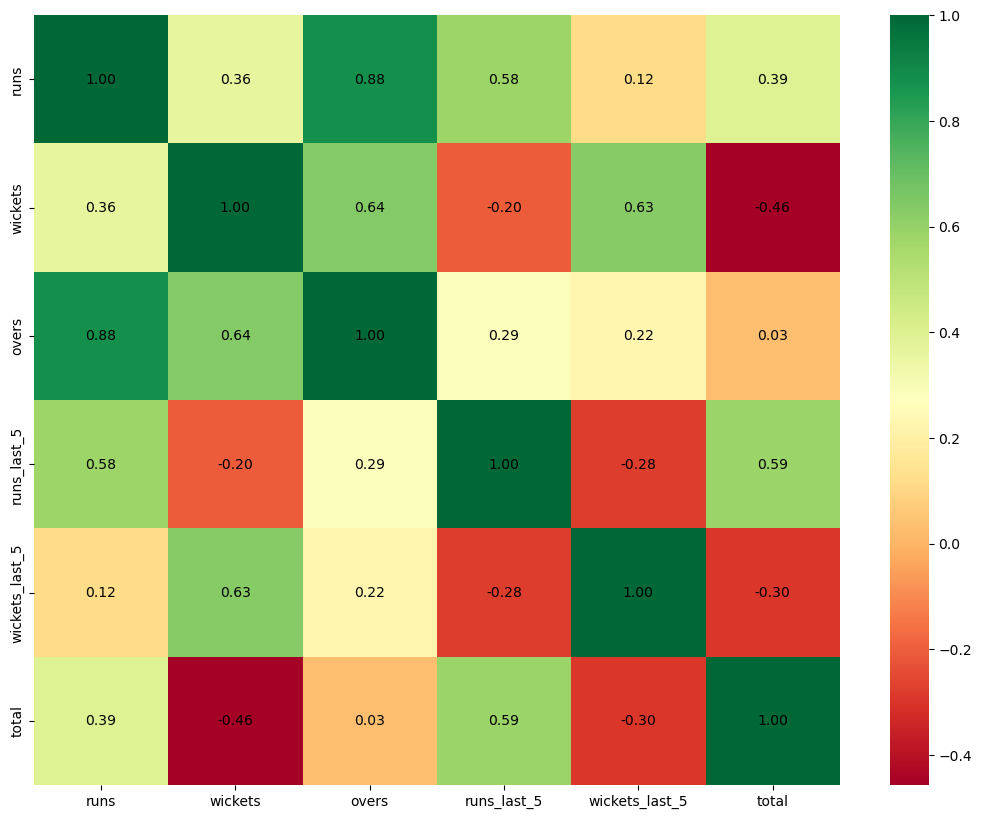

In [60]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=np.number)

# Get correlation matrix of numeric features
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(data=corr_matrix, cmap='RdYlGn')

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

## **Data Preprocessing**
*• Handling categorical features*<br/>
*• Splitting dataset into train and test set on the basis of date*<br/>

In [61]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [62]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [63]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [64]:
# Splitting the data into train and test set

from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = encoded_df.drop('total', axis=1) # Features
y = encoded_df['total'] # Target variable
# Split the dataset into training and testing sets (80% train, 20% test) with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target variable:", y_train.shape)
print("Shape of testing target variable:", y_test.shape)

Shape of training features: (32086, 21)
Shape of testing features: (8022, 21)
Shape of training target variable: (32086,)
Shape of testing target variable: (8022,)


## **Model Building**
We are experimenting with 4 different algorithms, they are as follows:<br/>
*• Linear Regression*<br/>
*• Decision Tree Regression*<br/>
*• Random Forest Regression*<br/>

----- Boosting Algorithm -----<br/>
*• Adaptive Boosting (AdaBoost) Algorithm*<br/>

### *Linear Regression*

In [65]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [66]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [67]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.9539797501702
Mean Squared Error (MSE): 296.8783233378895
Root Mean Squared Error (RMSE): 17.23015737995128


### *Decision Tree*

In [68]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [70]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.054973821989528
Mean Squared Error (MSE): 129.79387933183745
Root Mean Squared Error (RMSE): 11.392711675972382


### *Random Forest*

In [71]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [73]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.438001080362337
Mean Squared Error (MSE): 57.821405626226
Root Mean Squared Error (RMSE): 7.604038770694558


*Note: Since the Random Forest model performs best as compared to the other two, we use this model and boost its performance using AdaBoost Algorithm*

### *AdaBoost Algorithm*

In [74]:
# AdaBoost Model using Random Forest Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

base_regressor = RandomForestRegressor()
adb_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=30, learning_rate=0.5)

adb_regressor.fit(X_train, y_train)
print("AdaBoost model trained successfully")

AdaBoost model trained successfully


In [75]:
# Predicting results
y_pred_adb_rf = adb_regressor.predict(X_test)

In [76]:
# AdaBoost with Random Forest Regression - Model Evaluation
print("---- AdaBoost with Random Forest Regression - Model Evaluation ----")
print("Number of test samples:", len(y_test))
print("Number of predicted values:", len(y_pred_adb_rf))
print("Mean Absolute Error (MAE):", mae(y_test, y_pred_adb_rf))
print("Mean Squared Error (MSE):", mse(y_test, y_pred_adb_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mse(y_test, y_pred_adb_rf)))

---- AdaBoost with Random Forest Regression - Model Evaluation ----
Number of test samples: 8022
Number of predicted values: 8022
Mean Absolute Error (MAE): 4.6612877067658705
Mean Squared Error (MSE): 52.93242335408381
Root Mean Squared Error (RMSE): 7.275467225827068


*Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will use random forest regression model for prediction*

## **Predictions**
• Model *trained on* the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)<br/>
• Model *tested on* data from **IPL Season 10** ie: (2017)<br/>
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [77]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_df = pd.DataFrame({
        'batting_team': [batting_team],
        'bowling_team': [bowling_team],
        'overs': [overs],
        'runs': [runs],
        'wickets': [wickets],
        'runs_last_5': [runs_in_prev_5],
        'wickets_last_5': [wickets_in_prev_5]
    })

    # Convert categorical features using OneHotEncoding method
    temp_df = pd.get_dummies(data=temp_df, columns=['batting_team', 'bowling_team'])

    # Rearrange the columns to match the training data
    temp_df = temp_df.reindex(columns=X_train.columns, fill_value=0)

    # Prediction using Random Forest model
    return int(random_regressor.predict(temp_df)[0])
    

### **Prediction 1**
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9


In [78]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 145 to 160


### **Prediction 2**
• Date: 30th March 2019<br/>
• IPL : Season 12<br/>
• Match number: 9<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 176/7


In [79]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 181 to 196


### **Prediction 3**
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9


In [80]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 175 to 190


### **Prediction 4**
• Date: 7th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 39<br/>
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore<br/>
• First Innings final score: 146/10


In [81]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 139 to 154


### **Prediction 5**
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>


In [82]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 175 to 190


*Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down!*
